2019년과 2020년 비교 데이터, 2020년 3월을 기준 코로나를 중심으로 데이터를 비교하면 
더 좋은 인사이트를 얻을 것이다. 


In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

In [51]:
#2021년에 검색한 캠핑 관련 블로그 글 살펴보기. (2021.01 데이터 725개)
df = pd.read_csv('C:/Users/hongm/Machine Learing/new_output/크롤링_통합/캠핑_통합_725.csv')
df.head()


,post_dates,title,url,full_text,year,month
0,2021-01-01,캠핑온풍기 딜루비스 듀얼윈드 발난로로도 좋아.,https://blog.naver.com/crom234?Redirect=Log&lo...,[' 겨울철 오토캠핑을 한다면 필수적으로 필요한 난방기기가 있다. 각자의 방식에 따...,2021,1
1,2021-01-01,캠핑용품은 고릴라캠핑 인천점 오늘도 득템~,https://blog.naver.com/sandcastle44?Redirect=L...,[' 캠핑용품은 고릴라캠핑 인천점 오늘도 득템 고릴라캠핑 인천점 인천광역시 서구 ...,2021,1
2,2021-01-01,캠핑 빔프로젝터 걱정 고민 끝!,https://blog.naver.com/gohongik?Redirect=Log&l...,"[' 쌀쌀함을 넘어 매서운 바람이 부는 강추위에 캠프를 자주는 못 가고 있지만, ...",2021,1
3,2021-01-01,불멍 가서 쓴 메이스 휴대용 캠핑화로 후기,https://blog.naver.com/bloginhwa?Redirect=Log&...,[' 1년에 한두 번씩은 꼭 해외여행을 가거나 가까운 국내 관광지라도 다니던 저였는...,2021,1
4,2021-01-01,야당역 맛집 우리 감자탕 테이크아웃해서 캠핑가기,https://blog.naver.com/narudooly?Redirect=Log&...,[' 오늘부터 날씨가 좀 풀리는 것 같아요. 며칠동안 강추위도 견디더니 오늘 회사...,2021,1


In [129]:
#정규식 표현 한글 데이터만 남기기 
df['text'] = df['full_text'].apply(lambda x : re.sub('[^가-힣\s]','',x))



In [130]:
#drop ['full_text'] 칼럼 삭제

df.drop('full_text' ,axis =1)

,post_dates,title,url,year,month,text
0,2021-01-01,캠핑온풍기 딜루비스 듀얼윈드 발난로로도 좋아.,https://blog.naver.com/crom234?Redirect=Log&lo...,2021,1,겨울철 오토캠핑을 한다면 필수적으로 필요한 난방기기가 있다 각자의 방식에 따라 등...
1,2021-01-01,캠핑용품은 고릴라캠핑 인천점 오늘도 득템~,https://blog.naver.com/sandcastle44?Redirect=L...,2021,1,캠핑용품은 고릴라캠핑 인천점 오늘도 득템 고릴라캠핑 인천점 인천광역시 서구 봉수...
2,2021-01-01,캠핑 빔프로젝터 걱정 고민 끝!,https://blog.naver.com/gohongik?Redirect=Log&l...,2021,1,쌀쌀함을 넘어 매서운 바람이 부는 강추위에 캠프를 자주는 못 가고 있지만 전기담...
3,2021-01-01,불멍 가서 쓴 메이스 휴대용 캠핑화로 후기,https://blog.naver.com/bloginhwa?Redirect=Log&...,2021,1,년에 한두 번씩은 꼭 해외여행을 가거나 가까운 국내 관광지라도 다니던 저였는데요 ...
4,2021-01-01,야당역 맛집 우리 감자탕 테이크아웃해서 캠핑가기,https://blog.naver.com/narudooly?Redirect=Log&...,2021,1,오늘부터 날씨가 좀 풀리는 것 같아요 며칠동안 강추위도 견디더니 오늘 회사 수도...
...,...,...,...,...,...,...
720,2021-01-01,홍게다시팩 간단육수로 어묵탕 끓이기,https://blog.naver.com/sasabana?Redirect=Log&l...,2021,1,다시팩 간단육수 천연조미료 팽락닷컴 홍게다시팩 감칠맛나는 국물만들기 따뜻한 국...
721,2021-01-01,애견동반 가능한 용인 캠핑장 사계절 수영장까지 운영중,https://blog.naver.com/leejungwa?Redirect=Log&...,2021,1,애견동반 캠핑장 용인 구봉산 나인힐스 캠핑장에서 뜻밖에 설캠 추억을 만들다 사진첩...
722,2021-01-01,원주 소초면 카페 치악산 마운틴뷰 카페지(CAFE G),https://blog.naver.com/doros84?Redirect=Log&lo...,2021,1,작년에는 그렇게 눈이 오라고 기도를 해도 안 오더니 올해는 심심할 때마다 눈이 오...
723,2021-01-01,[인천반려견] 동막해변,https://blog.naver.com/4thfl5thfl?Redirect=Log...,2021,1,오늘은 여름에 친구들이랑 갔었던 동막해변 자주 오긴했었지만 이렇게 텐트를 펴고 ...


In [61]:
#원하는 데이터 칼럼만 정제

df_camp = df[['title', 'text','post_dates','year','month']]

In [63]:
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       725 non-null    object
 1   text        725 non-null    object
 2   post_dates  725 non-null    object
 3   year        725 non-null    int64 
 4   month       725 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 28.4+ KB


# 광고성 글 삭제 코드 추가

In [66]:
#한국어 형태소분석 = 명사 단위

#명사 형태소 추출

from konlpy.tag import Okt
from collections import Counter

nouns_tagger =  Okt()
nouns = nouns_tagger.nouns(df['text'][0])

In [131]:
nouns[:10]

['겨울철', '오토', '캠핑', '필수', '난방', '기기', '각자', '방식', '등유', '가스']

In [74]:
df['text'].tolist()

[' 겨울철 오토캠핑을 한다면 필수적으로 필요한 난방기기가 있다 각자의 방식에 따라 등유나 가스 등의 연료를 활용하는 난로를 사용하기도 하지만 안전하고 쉽게 사용할 수 있는 캠핑 온풍기의 사용은 냄새가 없고 보다 안전하다는 장점이 있어 많이 사용하고 있다 나 역시도 소형제품을 선택하여 사용하는데 아주 편하다 이번에 소개하는 이 녀석은 평상시 발난로로서의 활용도 아주 좋은 모습을 보여 주었다 캠핑을 하는 사람이라면 온풍기와 난로의 장단점을 잘 알고 있을것이다  온풍기는 무엇보다 환기가 필요 없고 일산화탄소에 대한 염려가 전혀 없는 부분이 가장 편하고 안심스러운 부분이다  캠핑 온풍기로 사용하기에 아주 적합한 사이즈와 색상 그리고 용량을 가지고 있다 방식으로 예열에도 많은 시간을 필요로 하지 않아 도착 후 세팅을 하는 시간 아이들이 안전하고 따듯하게 사용할 수 있게 해준다  딜루비스 듀얼윈드  온풍기의 장점이 보인다 말 그대로 다 믿기는 힘들겠지만 일단 특징들을 알 수 있다  이상 상태 발생시 자동으로 전원차단하는 기능이 있다 가장 최 우선적으로 걱정할 부분인 안전성에서는 걱정이 없겠다 동급 유일 좌우 회전 기능까지 있다 의 저전력 설계로 캠핑장에서도 자유롭게 활용할 수 있다 초소형 디자인으로 휴대성도 좋다 우선 캠핑용으로 사용하기에 필요한 모습들은 고루 갖추고 있는 모습이다  개봉을 해본다 뚜껑을 개봉하니 바로 본품이 나온다 캠핑용품은 되도록 튀는 색상을 지향하고 있는 입장에서 매우 마음에 드는 색깔이다 컨트롤 패드는 상단부 중앙에 집중되어 있고 버튼식이 아닌 터치 방식이다 전열기구는 사용 전 메뉴얼 회 정독은 필수 우선 안전성이 상당히 높은 제품이라는 평을 내린다 의 뜨거운 열기를 완전하게 다 막을 수는 없지만 철망앞에 한 번더 안전망이 있다 중으로 처리된 안전망에 대한 신뢰도를 높이 평가하고 싶다  뒷면에는 메인전원 장치가 있고 이 전원 버튼을 켠 다음 사용할 수 있게 된다 어디에 두어도 어색하지 않을듯한 디자인도 좋다 가볍고 이동용 손잡이가 있어서 손쉬운 

In [68]:
#전체 말뭉치(corpus)에서 명사 형태소 추출
#시간이 많이 걸림 (da)
nouns = nouns_tagger.nouns("".join(df['text'].tolist()))
#"".join() .tolist()하나의 택스트 뭉터기 형태로 넣어서 추출 

In [85]:
nouns

['겨울철',
 '오토',
 '캠핑',
 '필수',
 '난방',
 '기기',
 '각자',
 '방식',
 '등유',
 '가스',
 '등',
 '연료',
 '활용',
 '난로',
 '사용',
 '사용',
 '수',
 '캠핑',
 '풍기',
 '사용',
 '냄새',
 '장점',
 '사용',
 '나',
 '역시',
 '소형',
 '제품',
 '선택',
 '사용',
 '아주',
 '이번',
 '소개',
 '이',
 '녀석',
 '평상시',
 '발',
 '난로',
 '로서',
 '활용',
 '아주',
 '모습',
 '캠핑',
 '사람',
 '라면',
 '풍기',
 '난로',
 '장단점',
 '알',
 '풍기',
 '무엇',
 '환기',
 '필요',
 '일산화탄소',
 '대한',
 '염려',
 '전혀',
 '부분',
 '가장',
 '안심',
 '부분',
 '캠핑',
 '풍기',
 '사용',
 '아주',
 '사이즈',
 '색상',
 '용량',
 '가지',
 '방식',
 '열',
 '시간',
 '필요',
 '도착',
 '후',
 '세팅',
 '시간',
 '아이',
 '사용',
 '수',
 '딜루비스',
 '듀얼',
 '윈드',
 '풍기',
 '장점',
 '말',
 '그대로',
 '일단',
 '특징',
 '알',
 '수',
 '이상',
 '상태',
 '발생',
 '시',
 '자동',
 '차단',
 '기능',
 '가장',
 '최',
 '우선',
 '걱정',
 '부분',
 '안전성',
 '걱정',
 '급',
 '유일',
 '좌우',
 '회전',
 '기능',
 '의',
 '전력',
 '설계',
 '캠핑장',
 '활용',
 '수',
 '초소',
 '디자인',
 '휴대',
 '성도',
 '우선',
 '캠핑',
 '용',
 '사용',
 '모습',
 '고루',
 '모습',
 '개봉',
 '뚜껑',
 '개봉',
 '바로',
 '품',
 '캠핑',
 '용품',
 '색상',
 '지향',
 '입장',
 '매우',
 '마음',
 '색깔',
 '컨트롤',
 '패드',
 '상단',
 '부',
 '중앙'

In [69]:
#단어 갯수 세기 
counter = Counter(nouns)
counter.most_common(10)

[('캠핑', 4384),
 ('수', 2014),
 ('사용', 1632),
 ('것', 1461),
 ('때', 1156),
 ('더', 919),
 ('텐트', 889),
 ('제품', 796),
 ('집', 731),
 ('이', 714)]

In [88]:
#한글자 명사 제거 

camp_nouns = []
for noun in nouns:
    if len(noun) > 1 :
        camp_nouns.append(noun)
camp_nouns


['겨울철',
 '오토',
 '캠핑',
 '필수',
 '난방',
 '기기',
 '각자',
 '방식',
 '등유',
 '가스',
 '연료',
 '활용',
 '난로',
 '사용',
 '사용',
 '캠핑',
 '풍기',
 '사용',
 '냄새',
 '장점',
 '사용',
 '역시',
 '소형',
 '제품',
 '선택',
 '사용',
 '아주',
 '이번',
 '소개',
 '녀석',
 '평상시',
 '난로',
 '로서',
 '활용',
 '아주',
 '모습',
 '캠핑',
 '사람',
 '라면',
 '풍기',
 '난로',
 '장단점',
 '풍기',
 '무엇',
 '환기',
 '필요',
 '일산화탄소',
 '대한',
 '염려',
 '전혀',
 '부분',
 '가장',
 '안심',
 '부분',
 '캠핑',
 '풍기',
 '사용',
 '아주',
 '사이즈',
 '색상',
 '용량',
 '가지',
 '방식',
 '시간',
 '필요',
 '도착',
 '세팅',
 '시간',
 '아이',
 '사용',
 '딜루비스',
 '듀얼',
 '윈드',
 '풍기',
 '장점',
 '그대로',
 '일단',
 '특징',
 '이상',
 '상태',
 '발생',
 '자동',
 '차단',
 '기능',
 '가장',
 '우선',
 '걱정',
 '부분',
 '안전성',
 '걱정',
 '유일',
 '좌우',
 '회전',
 '기능',
 '전력',
 '설계',
 '캠핑장',
 '활용',
 '초소',
 '디자인',
 '휴대',
 '성도',
 '우선',
 '캠핑',
 '사용',
 '모습',
 '고루',
 '모습',
 '개봉',
 '뚜껑',
 '개봉',
 '바로',
 '캠핑',
 '용품',
 '색상',
 '지향',
 '입장',
 '매우',
 '마음',
 '색깔',
 '컨트롤',
 '패드',
 '상단',
 '중앙',
 '집중',
 '버튼',
 '식이',
 '터치',
 '방식',
 '열기구',
 '사용',
 '메뉴얼',
 '정독',
 '필수',
 '우선',
 '안전성',
 '제품',
 '린다',
 '열기',
 '철망',
 '번

In [93]:
counter = Counter(camp_nouns)
counter.most_common(10)

[('캠핑', 4384),
 ('사용', 1632),
 ('텐트', 889),
 ('제품', 796),
 ('캠핑장', 692),
 ('생각', 594),
 ('시간', 555),
 ('하나', 544),
 ('정말', 537),
 ('아이', 521)]

In [97]:
#Counter로 lambda 한글자된 명사 제거
available_counter= Counter({x: counter[x] for x in counter if len(x) > 1}) #lambda 사용 {} ??? 
available_counter.most_common(20)

[('캠핑', 4384),
 ('사용', 1632),
 ('텐트', 889),
 ('제품', 796),
 ('캠핑장', 692),
 ('생각', 594),
 ('시간', 555),
 ('하나', 544),
 ('정말', 537),
 ('아이', 521),
 ('우리', 517),
 ('사진', 508),
 ('때문', 507),
 ('테이블', 456),
 ('정도', 422),
 ('준비', 416),
 ('가지', 393),
 ('스피커', 392),
 ('난로', 391),
 ('겨울', 382)]

In [71]:
#불용어 사전 
# source - https://www.ranks.nl/stopwords/korean
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
print(stopwords[:10])

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해']]


In [122]:
#특정 불용어 명사 직접 추가 
naver_stopwords = ['사용','정말','하나' ,'생각','우리', '때문','정도','가지', '바로','그냥', '사진','요즘' ,'오늘']
for word in naver_stopwords:
    stopwords.append(word)
print(stopwords[:10])

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해']]


In [123]:
#불용어 빼기 
camp_word_selected = []
for noun in camp_nouns:
    if noun not in stopwords:
        camp_word_selected.append(noun)
        
camp_count_selected = Counter(camp_word_selected)
camp_count_selected.most_common(20)

[('캠핑', 4384),
 ('텐트', 889),
 ('제품', 796),
 ('캠핑장', 692),
 ('시간', 555),
 ('아이', 521),
 ('테이블', 456),
 ('준비', 416),
 ('스피커', 392),
 ('난로', 391),
 ('겨울', 382),
 ('요리', 379),
 ('여행', 366),
 ('이번', 365),
 ('매트', 365),
 ('고기', 364),
 ('용품', 361),
 ('사이즈', 359),
 ('감성', 359),
 ('차박', 333)]

In [124]:
#bar 그래프로 시각화 하기 

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32','win64']:
    font_name='malgun gothic'
elif sys.platform == 'darwin':
    font_name = "AppleGothic"
    
rc('font', family =font_name)

In [125]:
camp_counts_df = pd.DataFrame(camp_count_selected.most_common(30))
camp_counts_df.columns = ['nouns','counts']

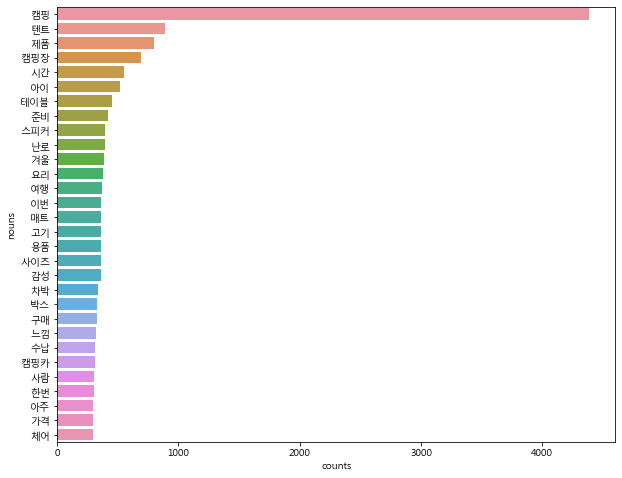

In [126]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='nouns', data= camp_counts_df)

In [127]:
#추출한 명사 리스트를 활용해 명사만으로 이뤄진 문서 생성 (워드 클라우드 생성에 필요)
noun_doc = ' '.join(camp_word_selected)
noun_doc = noun_doc.strip()



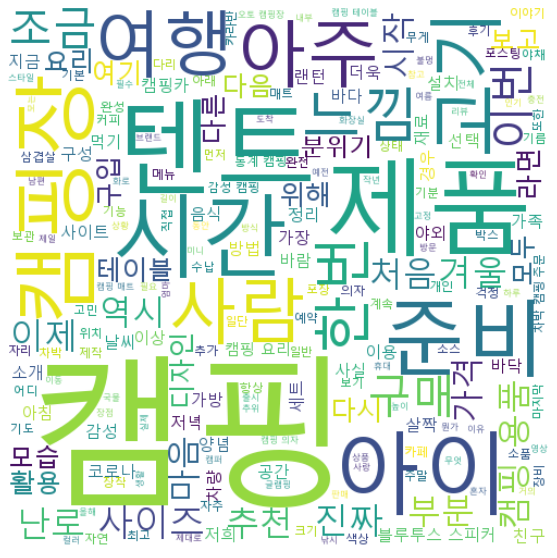

In [128]:
#워드클라우드 파라미터 설정 
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

font_path="G:/workpy/zoom/malgun.ttf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()